In [ ]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('metrics.csv', parse_dates=['timestamp'])

## Latenz pro Query/Match-Type

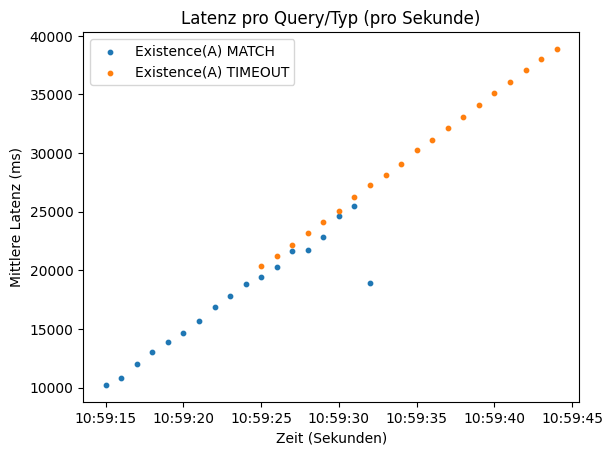

In [22]:
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['sekunde'] = df['timestamp'].dt.floor('s')
grouped = df.groupby(['query', 'match_type', 'sekunde'])['ms'].mean().reset_index()

for query in grouped['query'].unique():
    if query == "THROUGHPUT":
        continue
    for mtype in ['MATCH', 'TIMEOUT']:
        sub = grouped[(grouped['query'] == query) & (grouped['match_type'] == mtype)]
        if not sub.empty:
            plt.scatter(sub['sekunde'], sub['ms'], s=10, label=f"{query} {mtype}")

plt.xlabel('Zeit (Sekunden)')
plt.ylabel('Mittlere Latenz (ms)')
plt.title('Latenz pro Query/Typ (pro Sekunde)')
plt.legend()
plt.show()


## Durchsatz pro Sekunde

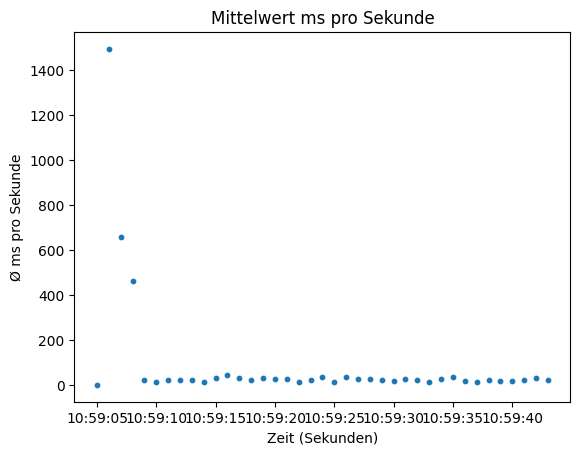

In [ ]:
df_throughput = df[df['query'] == 'THROUGHPUT'].copy()
df_throughput['sekunde'] = df_throughput['timestamp'].dt.floor('s')

# Mittelwert pro Sekunde
grouped = df_throughput.groupby('sekunde')['ms'].mean().reset_index()
plt.figure()
plt.scatter(grouped['sekunde'], grouped['ms'], s=10)
plt.xlabel('Zeit (Sekunden)')
plt.ylabel('Ø ms pro Sekunde')
plt.title('Mittelwert ms pro Sekunde')
plt.show()

